# A3-Q4: Golf Driving Range

In [2]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

In [3]:
# Supplied functions
def Ground(d):
    '''
     h = Ground(d)
     
     Returns the height (in metres) of the ground at a horizontal distance
     d (metres) from the origin.
    '''
    return np.sin(d/3.) - 3.*np.sin(d/10.)

def GroundSlope(d):
    '''
     h = GroundSlope(d)
     
     Returns the slope of the ground at a horizontal distance
     d (metres) from the origin.
    '''
    return 1./3*np.cos(d/3) - 3./10*np.cos(d/10.)

## (a) MyOde

In [4]:
def MyOde(f, tspan, y0, h, event=(lambda t,y:1)):
    '''
     t,y = MyOde(f, tspan, y0, h, event=[])
    
     Numerically solves the initial value problem
    
        dy(t)/dt = f(t,y)
            y(0) = y0
    
     using the Modified Euler time-stepping method.
    
     Input
       f       a Python dynamics function with calling sequence
                  dydt = f(t, y)
       tspan   2-tuple giving the start and end times, [start, end]
       y0      initial state of the system (as a 1D vector)
       h       the time step to use (this is not adaptive time stepping)
       events  an event function with calling sequence
                  val = events(t, y)
               The computation stops as soon as a negative value is
               returned by the event function.
    
     Output
       t       1D vector holding time stamps
       y       an array that holds one state vector per row (corresponding
               to the time stamps)
    
       Notes:
           - t and y have the same number of rows.
    
           - The first element of t should be tspan[0], and the first
             row of y should be the initial state, y0.
             
           - The event function is NOT called until the second time step.
    
           - If the computation was stopped by the triggering of an event,
             then the last row of t and y should correspond to the
             time that linear interpolation indicates for the zero-crossing
             of the event-function.
    '''
    
    # Initialize output arrays, tlst and ylst
    t = tspan[0]
    end = tspan[1]
    y = deepcopy(y0)
    
    tlst = []
    ylst = []
    
    tlst.append(t)
    ylst.append(list(y))

    while (event(t, y) >= 0 and t < end):
        y_1_star = y + h*f(t,y)
        y = y + h/2*(f(t,y)+f(t+h, y_1_star))
        t += h
        tlst.append(t)
        ylst.append(list(y))
    
    # Return the time stamps, and corresponding solutions
    return tlst, np.array(ylst)

## (b) Dynamics Function: `projectile`

In [5]:
def projectile(t, z):
    dzdt = np.zeros_like(z)
    '''
    y[0] = x(t)
    y[1] = y(t)
    y[2] = x'(t)
    y[3] = y'(t)
    '''
    dzdt[0] = z[2]
    dzdt[1] = z[3]
    dzdt[2] = -0.5*z[2]
    dzdt[3] = -9.81-0.5*z[3]
    
    return dzdt

## (c) Events Function: `projectile_events`

In [6]:
def projectile_events(t, z):
    d = z[0]
    return z[1] - Ground(d)

## (d) Two flights

In [14]:
# Here is the code for one sample flight.
theta = 45
S = 70
tspan = [0, 30]
h = 0.05
theta_rad = theta/180.*np.pi
yStart = np.array([0, 0, S*np.cos(theta_rad), S*np.sin(theta_rad)])
t,y = MyOde(projectile, tspan, yStart, h, projectile_events)

tspan = [t[-1], 30]
yStart = y[-1]
#print (yStart)
# print(y[-1])
# print(y[-2])

v=np.array([yStart[2], yStart[3]])
u=np.array([1, GroundSlope(yStart[0])])
U=np.array([-1, 1/GroundSlope(yStart[0])])

u = u / np.linalg.norm(u) #transfer the scalar to unit scalar.
U = u / np.linalg.norm(U)

u[0] = np.sqrt(1/(1+GroundSlope(yStart[0])* GroundSlope(yStart[0])))
u[1]= u[0]*GroundSlope(yStart[0])
U[0] = -u[1]
U[1] = u[0]
V=0.85*(np.dot(v,u)*u - np.dot(v,U)*U)
print(np.linalg.norm(v))
print(np.linalg.norm(V))
print(v)
print(u)
print(U)
print(V)

# print(np.vdot(v,u))
# print(np.vdot(v,U))
yStart[1] = Ground(yStart[0])
yStart[2] = V[0]
yStart[3] = V[1]+10

# print (yStart)

t_2,y_2 = MyOde(projectile, tspan, yStart, h, projectile_events)

17.391178049213497
14.782501341831471
[  1.65248882 -17.31249129]
[0.86034988 0.50970392]
[-0.50970392  0.86034988]
[-12.2315116   8.3013535]


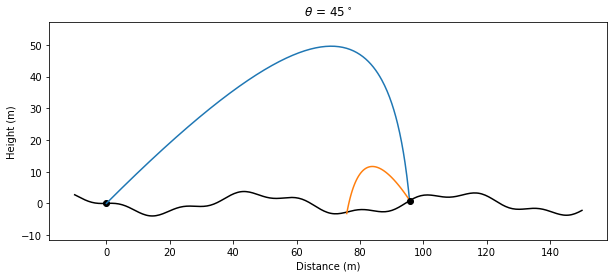

In [15]:
# Plot the ground
x = np.linspace(-10, 150, 300)
hills = Ground(x)
plt.figure(figsize=[10,4])
plt.plot(x,hills, 'k')
plt.axis('equal')
plt.plot([0],[0], 'ko')   # Plot initial ball position
plt.plot(y[:,0], y[:,1])  # Plot ball trajectory
plt.plot(y_2[:,0], y_2[:,1])  # Plot ball trajectory
plt.plot(y[-1,0], y[-1,1], 'ko')  # Plot final ball position
plt.title(r'$\theta$ = '+str(theta)+'$^\circ$');
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)');


In [25]:
t_final1 = []
t_final2 = []
y_final1 = []
y_final2 = []

furthest_distance = 0
record_theta = 0

for i in range(1,90):
    theta = i
    S = 70
    tspan = [0, 30]
    h = 0.05
    theta_rad = theta/180.*np.pi
    yStart = np.array([0, 0, S*np.cos(theta_rad), S*np.sin(theta_rad)])
    t,y = MyOde(projectile, tspan, yStart, h, projectile_events)

    tspan = [t[-1], 30]
    yStart = y[-1]
    #print (yStart)
    # print(y[-1])
    # print(y[-2])

    v=np.array([yStart[2], yStart[3]])
    u=np.array([1, GroundSlope(yStart[0])])
    U=np.array([-1, 1/GroundSlope(yStart[0])])

    u = u / np.linalg.norm(u) #transfer the scalar to unit scalar.
    U = u / np.linalg.norm(U)

    u[0] = np.sqrt(1/(1+GroundSlope(yStart[0])* GroundSlope(yStart[0])))
    u[1]= u[0]*GroundSlope(yStart[0])
    U[0] = -u[1]
    U[1] = u[0]
    V=0.85*(np.dot(v,u)*u - np.dot(v,U)*U)
#     print(np.linalg.norm(v))
#     print(np.linalg.norm(V))
#     print(v)
#     print(u)
#     print(U)
#     print(V)

    # print(np.vdot(v,u))
    # print(np.vdot(v,U))
    yStart[1] = Ground(yStart[0])
    yStart[2] = V[0]
    yStart[3] = V[1]+10

    # print (yStart)

    t_2,y_2 = MyOde(projectile, tspan, yStart, h, projectile_events)
#     print('furthest distance: ', furthest_distance)
#     print(y_2[-1,0])
    if (y_2[-1,0] > furthest_distance):
        furthest_distance = y_2[-1,0]
        record_theta = theta
        t_final1 = t
        t_final2 = t_2
        y_final1 = y
        y_final2 = y_2
    


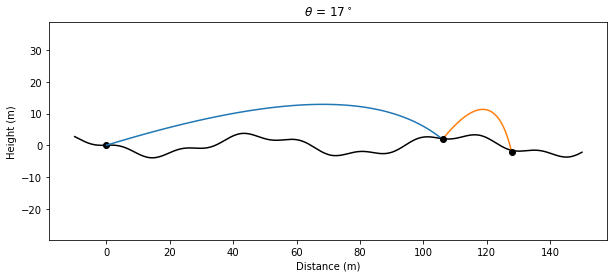

In [26]:
# Plot the ground
x = np.linspace(-10, 150, 300)
hills = Ground(x)
plt.figure(figsize=[10,4])
plt.plot(x,hills, 'k')
plt.axis('equal')
plt.plot([0],[0], 'ko')   # Plot initial ball position
plt.plot(y_final1[:,0], y_final1[:,1])  # Plot ball trajectory
plt.plot(y_final2[:,0], y_final2[:,1])  # Plot ball trajectory
plt.plot(y_final1[-1,0], y_final1[-1,1], 'ko')  # Plot final ball position
plt.plot(y_final2[-1,0], y_final2[-1,1], 'ko')  # Plot final ball position
plt.title(r'$\theta$ = '+str(record_theta)+'$^\circ$');
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)');

## (e) Optimal $\theta$

When theta = 17, the distance is the furthest.